In [556]:
import pandas as pd
import numpy as np
# mecab1 = pd.read_csv('/content/데이터수집본(중복없음) (1).csv')

In [557]:
test1=pd.read_csv('/content/finaltest11.csv')

In [596]:
test1[:8000]

,Unnamed: 0,tokens,tone,word
0,0,우리 강아지 애기 자꾸 내밀어서 충치 구강 구조 문제 있으면 밀고 있는대서 덜덜 떨...,0,"[78, 1906, 1540, 1907, 2628, 113, 2629, 2630, ..."
1,1,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...,-2,"[25, 10, 787, 246, 32, 24, 583, 246, 32, 896, ..."
2,2,지형 높아서 침수 되고 오고 여름 덥고 하아,-1,"[2891, 1230, 363, 7, 10, 4, 104, 4, 259, 2634,..."
3,3,진짜 살다 살다 재난 상황 어떻게 복구 다음 재난 어떻게 대비 할지 대한 뉴스 아니...,0,"[63, 154, 11, 154, 11, 39, 38, 388, 66, 43, 39..."
4,4,여러분 대구 날씨 어떤 가요 여기 하늘 뚫린 같은데 지방 폭염 주의보 믿기지가 않어요,-1,"[158, 1612, 175, 227, 976, 150, 724, 1770, 32,..."
...,...,...,...,...
7995,7995,폭우 쏟아져 강남역 일대 물바다 시간 사이 실종 되었는데 뚜껑 폭발 열린 한강 이어...,-1,"[6, 3585, 191, 1401, 3586, 116, 920, 387, 10, ..."
7996,7996,지겹게 이어지던 산불 가득하다,-1,"[1265, 20, 769, 17, 23, 980, 2, 11]"
7997,7997,장마 패턴 폭우 폭염 폭우 반복 되는 형태 최근 수년 사이 과거 달라졌다 온난화 대...,-1,"[300, 1088, 6, 28, 6, 663, 10, 3, 889, 441, 11..."
7998,7998,트위터 보고 진짜 게으른 사람 게으름 탈출 읽었는데 저자 얘기 공감 된다 현실 직면...,0,"[425, 31, 4, 63, 1923, 45, 1924, 759, 775, 13,..."


In [559]:
test2=test1[:5600]

In [560]:
test3=test1[5600:7999]

In [561]:
mecab2=mecab1[:7500]

In [562]:
mecab3=mecab1[7500:]

In [563]:
mecab3

,Unnamed: 0,Unnamed: 0.1,ID,Text,Date,Key,duplicates


In [564]:
from tensorflow.keras.preprocessing.text import Tokenizer
import os
import pickle

tokenizer_name = 'keras_naver_review_tokenizer.pickle'
save_path = os.path.join(os.getcwd(), tokenizer_name)

max_words = 35000
tokenizer = Tokenizer(num_words=max_words, oov_token = True)
tokenizer.fit_on_texts(test2.word)
test2.word = tokenizer.texts_to_sequences(test2.word)
test3.word = tokenizer.texts_to_sequences(test3.word)

with open(save_path, 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

test2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,tokens,tone,word
0,0,우리 강아지 애기 자꾸 내밀어서 충치 구강 구조 문제 있으면 밀고 있는대서 덜덜 떨...,0,"[78, 1906, 1540, 1907, 2628, 113, 2629, 2630, ..."
1,1,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...,-2,"[25, 10, 787, 246, 32, 24, 583, 246, 32, 896, ..."
2,2,지형 높아서 침수 되고 오고 여름 덥고 하아,-1,"[2891, 1230, 363, 7, 10, 4, 104, 4, 259, 2634,..."
3,3,진짜 살다 살다 재난 상황 어떻게 복구 다음 재난 어떻게 대비 할지 대한 뉴스 아니...,0,"[63, 154, 11, 154, 11, 39, 38, 388, 66, 43, 39..."
4,4,여러분 대구 날씨 어떤 가요 여기 하늘 뚫린 같은데 지방 폭염 주의보 믿기지가 않어요,-1,"[158, 1612, 175, 227, 976, 150, 724, 1770, 32,..."


In [565]:
X_train = test2.word
Y_train = test2.tone

X_test = test3.word
Y_test = test3.tone

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('\nX_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (5600,)
Y_train shape:  (5600,)

X_test shape:  (2399,)
Y_test shape:  (2399,)


In [566]:
X_train.shape

(5600,)

In [567]:
len(X_train[5000])

43

In [568]:
# train셋 y분포
pd.DataFrame(Y_train).value_counts()

tone
-1      3213
 0      1032
 1       869
-2       486
dtype: int64

In [569]:
# test셋 y분포
pd.DataFrame(Y_test).value_counts()

tone
-1      1332
 0       448
 1       384
-2       235
dtype: int64

In [570]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len=40
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (5600, 40)
X_test shape:  (2399, 40)


In [571]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [572]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Train
batch_size = Y_train.shape[0]
input_dim = 1
Y_train = encoder.fit_transform(Y_train) # Labeling
Y_train = np.reshape(Y_train, (batch_size, input_dim)) # Reshape
# Test
batch_size = Y_test.shape[0]
Y_test = encoder.transform(Y_test) # Labeling
Y_test = np.reshape(Y_test, (batch_size, input_dim)) # Reshape

print(Y_train.shape)
print(Y_test.shape)

(5600, 1)
(2399, 1)


In [573]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
tf.random.set_seed(17)
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [574]:
from sklearn.model_selection import train_test_split
X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)


In [575]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=5)


Epoch 1/5
175/175 [==============================] - 16s 80ms/step - loss: 0.4896 - accuracy: 0.8234
Epoch 2/5
175/175 [==============================] - 14s 77ms/step - loss: 0.0553 - accuracy: 0.9859
Epoch 3/5
175/175 [==============================] - 14s 78ms/step - loss: 0.0153 - accuracy: 0.9968
Epoch 4/5
175/175 [==============================] - 14s 77ms/step - loss: 0.0047 - accuracy: 0.9991
Epoch 5/5
175/175 [==============================] - 14s 77ms/step - loss: 0.0021 - accuracy: 0.9995


In [576]:
loss, acc = model.evaluate(X_test, Y_test, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc)

75/75 [==============================] - 1s 15ms/step - loss: 0.0183 - accuracy: 0.9962
Test loss: 0.018256690353155136
Test accuracy: 0.9962484240531921


75/75 [==============================] - 1s 14ms/step - loss: 0.0183 - accuracy: 0.9962

 정확도 : 0.9962


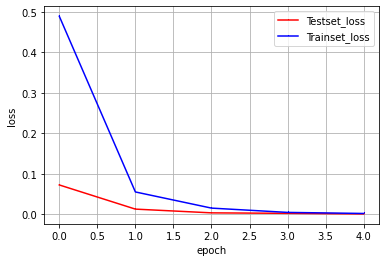

In [577]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, Y_test)[1]))

# y_test_loss = hist.history['val_loss']
y_train_loss = hist.history['loss']

x_len = np.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()




In [578]:
# %pip install PyKomoran

In [579]:
# from PyKomoran import *

In [580]:
# import os

# save_dir = os.getcwd()
# model_name = 'keras_naver_review_trained_model.h5'

# # Save model and weights
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

In [581]:
# from  tensorflow.keras.models import load_model
# import os
# import pickle

# def load_tokenizer(path):
#     with open(path, 'rb') as f:
#         tokenizer = pickle.load(f)
#     return tokenizer

# load_dir = os.getcwd()
# model_name = 'keras_naver_review_trained_model.h5'
# tokenizer_name = 'keras_naver_review_tokenizer.pickle'
# model_path = os.path.join(load_dir, model_name)
# tokenizer_path = os.path.join(load_dir, tokenizer_name)

# model = load_model(model_path)
# tokenizer = load_tokenizer(tokenizer_path)

In [582]:
# model1=model.predict(X_test)

In [583]:
# model1[0]

In [584]:
# import numpy as np
# from PyKomoran import *
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_len=40
# komoran = Komoran("STABLE")
# stop_pos_tags =  ['IC', 'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 
#                    'EF', 'ETN', 'ETM', 'XSA', 'SF', 'SP', 'SS', 'SE', 'SO', 'SL', 'SH', 
#                    'SW', 'NF', 'NV', 'SN', 'NA']

# def tokenize(corpus, stop_pos_tags):
#     result = []
#     pairs = komoran.get_list(corpus)
#     for pair in pairs:
#         morph = pair.get_first()
#         pos = pair.get_second()
#         if pos not in stop_pos_tags:
#             if pos in ['VV', 'VA', 'VX', 'VCP', 'VCN']:
#                 morph = morph + '다'
#             result.append(morph)
#     return result

# def predict_sentiment(text, model):
#     tokens = []
#     tokens.append(tokenize(text, stop_pos_tags))
#     tokens = tokenizer.texts_to_sequences(tokens)
#     x_test = pad_sequences(tokens, maxlen=max_len)
#     predict = model.predict(X_test)
#     if predict[0][2] > 0:
#         return 'GOOD'
#     else:
#         return 'BAD'

# review_text = '재미없는 영화입니다.'
# result = predict_sentiment(review_text, model)

# print('{} : {}'.format(review_text, result))

In [585]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
tf.random.set_seed(20220818)
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(GRU(128, dropout=0.6,recurrent_dropout=0.6))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [587]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=5)

Epoch 1/5
175/175 [==============================] - 16s 74ms/step - loss: 0.5684 - accuracy: 0.7923
Epoch 2/5
175/175 [==============================] - 13s 73ms/step - loss: 0.0633 - accuracy: 0.9804
Epoch 3/5
175/175 [==============================] - 13s 73ms/step - loss: 0.0141 - accuracy: 0.9962
Epoch 4/5
175/175 [==============================] - 13s 74ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 5/5
175/175 [==============================] - 13s 74ms/step - loss: 0.0045 - accuracy: 0.9987


In [588]:
loss, acc = model.evaluate(X_test, Y_test, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc)

75/75 [==============================] - 1s 14ms/step - loss: 0.0273 - accuracy: 0.9921
Test loss: 0.027257947251200676
Test accuracy: 0.99208003282547


75/75 [==============================] - 1s 14ms/step - loss: 0.0273 - accuracy: 0.9921

 정확도 : 0.9921


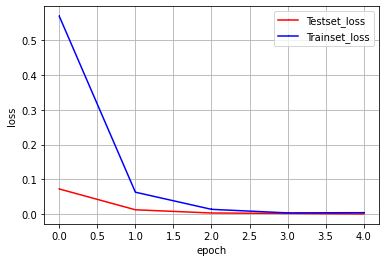

In [589]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, Y_test)[1]))

# y_test_loss = hist.history['val_loss']
y_train_loss = hist.history['loss']

x_len = np.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [590]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
tf.random.set_seed(12)
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(SimpleRNN(128, dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [592]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=5)

Epoch 1/5
175/175 [==============================] - 7s 34ms/step - loss: 1.3764 - accuracy: 0.3655
Epoch 2/5
175/175 [==============================] - 6s 34ms/step - loss: 1.0380 - accuracy: 0.5852
Epoch 3/5
175/175 [==============================] - 6s 33ms/step - loss: 0.7682 - accuracy: 0.7070
Epoch 4/5
175/175 [==============================] - 6s 34ms/step - loss: 0.5859 - accuracy: 0.7845
Epoch 5/5
175/175 [==============================] - 6s 34ms/step - loss: 0.4569 - accuracy: 0.8405


In [593]:
loss, acc = model.evaluate(X_test, Y_test, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc)

75/75 [==============================] - 1s 6ms/step - loss: 0.3486 - accuracy: 0.8654
Test loss: 0.34863510727882385
Test accuracy: 0.8653605580329895


75/75 [==============================] - 0s 6ms/step - loss: 0.3486 - accuracy: 0.8654

 정확도 : 0.8654


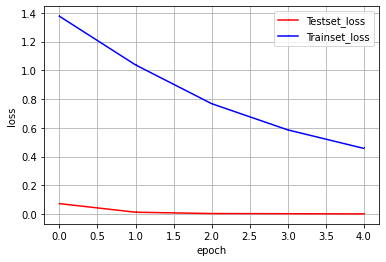

In [594]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, Y_test)[1]))

# y_test_loss = hist.history['val_loss']
y_train_loss = hist.history['loss']

x_len = np.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()